In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Reading datasets
train = pd.read_csv(r"C:\Users\user\Downloads\train (3).csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# display categorical variables

categorical = [col for col in train.columns if train[col].dtypes == 'O']

categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [6]:
print(train.shape)

(891, 12)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
import warnings
warnings.filterwarnings('ignore')
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [9]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

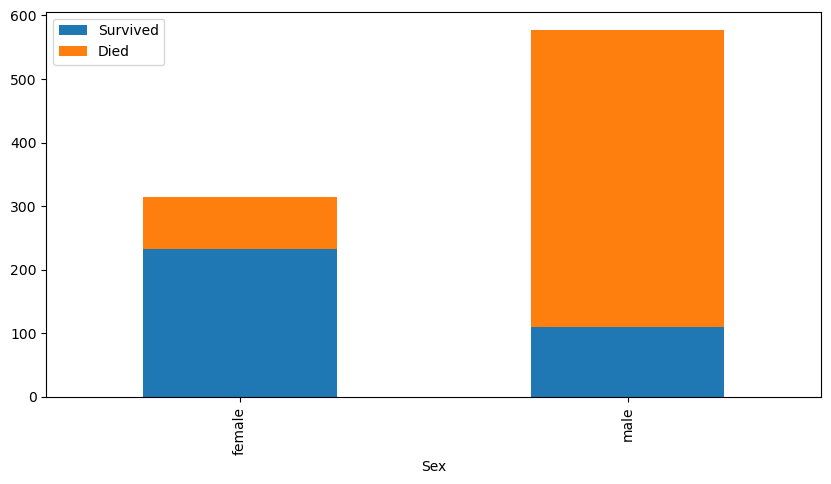

In [11]:
# Visualizing survivals based on gender
import warnings
warnings.filterwarnings('ignore')
train['Died'] = 1 - train['Survived']
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',figsize=(10, 5),stacked=True)


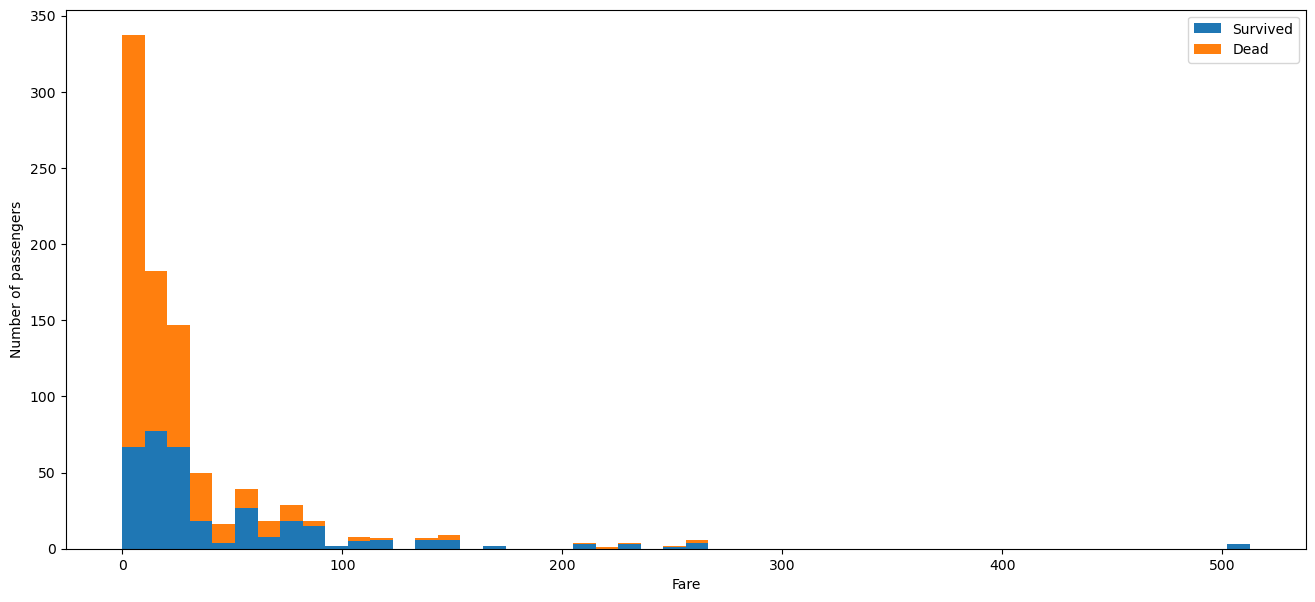

In [12]:
## Visualizing survivals based on fare
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, bins=50, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()


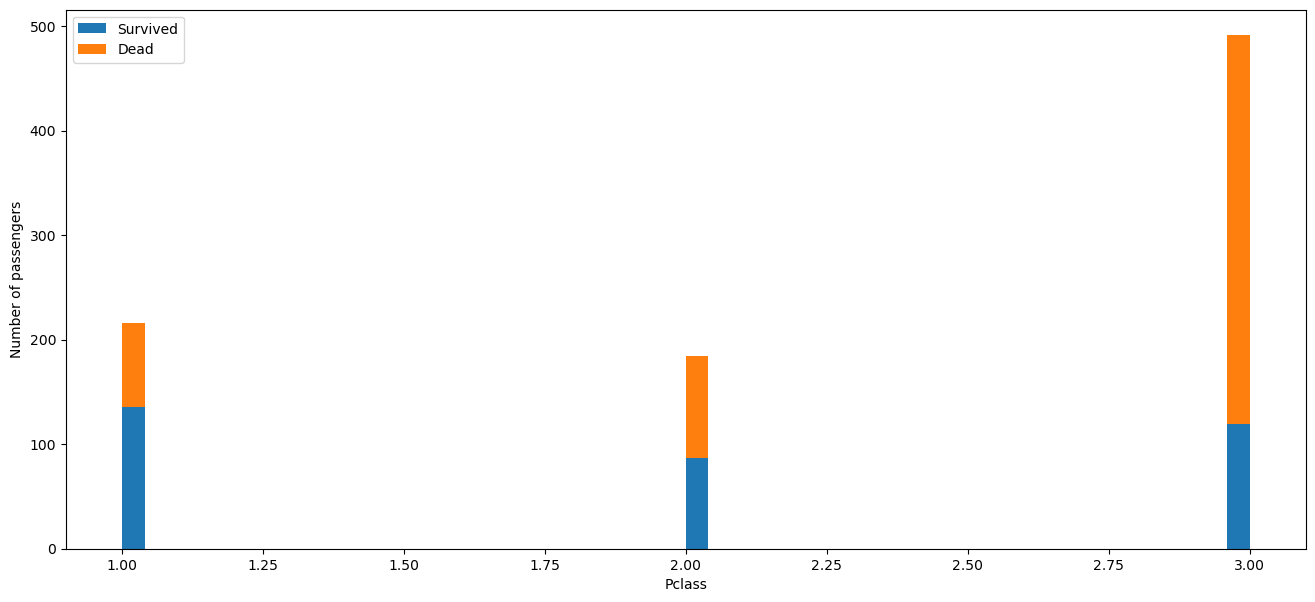

In [13]:
## Visualizing survivals based on pclass
figure = plt.figure(figsize=(16, 7))
plt.hist([train[train['Survived'] == 1]['Pclass'], train[train['Survived'] == 0]['Pclass']], 
         stacked=True, bins=50, label=['Survived', 'Dead'])
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')
plt.legend()


In [14]:
# Cleaning the data by removing irrelevant columns
df1 = train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId','Died'], axis=1)
df1.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [15]:
df1.shape

(891, 8)

In [16]:
# display categorical variables

categorical = [col for col in df1.columns if df1[col].dtypes == 'O']

categorical

['Sex', 'Embarked']

In [17]:
print(df1['Sex'].value_counts())
print("\nembarked classes",df1['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64

embarked classes S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [18]:
# Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df1.Sex = df1.Sex.map({'female': 0, 'male': 1})
df1.Embarked = df1.Embarked.map({'S': 0, 'C': 1, 'Q': 2,'nan':'NaN'})
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,NaN,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


In [19]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
# Mean age of each sex
mean_age_men = df1[df1['Sex'] == 1]['Age'].mean()
mean_age_women = df1[df1['Sex'] == 0]['Age'].mean()


In [21]:
# Filling all the null values in 'Age' with respective mean age
df1.loc[(df1.Age.isnull()) & (df1['Sex'] == 0), 'Age'] = mean_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex'] == 1), 'Age'] = mean_age_men
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,27.915709,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [22]:
# Let's check for the null values again now
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
# Since there exist null values in the Embarked column, let's drop those rows containing null values
df1.dropna(inplace=True)

In [24]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,27.915709,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [25]:
# Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df1.Age = (df1.Age - min(df1.Age)) / (max(df1.Age) - min(df1.Age))
df1.Fare = (df1.Fare - min(df1.Fare)) / (max(df1.Fare) - min(df1.Fare))
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,0
887,1,1,0,0.233476,0,0,0.058556,0
888,0,3,0,0.345510,1,2,0.045771,0
889,1,1,1,0.321438,0,0,0.058556,1


In [26]:
X=df1.drop(columns=['Survived'])
y=df1["Survived"]

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.271174,1,0,0.014151,0
1,1,0,0.472229,1,0,0.139136,1
2,3,0,0.321438,0,0,0.015469,0
3,1,0,0.434531,1,0,0.103644,0
4,3,1,0.434531,0,0,0.015713,0
...,...,...,...,...,...,...,...
886,2,1,0.334004,0,0,0.025374,0
887,1,0,0.233476,0,0,0.058556,0
888,3,0,0.345510,1,2,0.045771,0
889,1,1,0.321438,0,0,0.058556,1


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [29]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (711, 7) (711,)
Testing set shape: (178, 7) (178,)


In [33]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [34]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [35]:
# Predictions
rf_predictions = rf_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)


In [36]:
# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)



Random Forest Accuracy: 0.7528089887640449
Decision Tree Accuracy: 0.7471910112359551


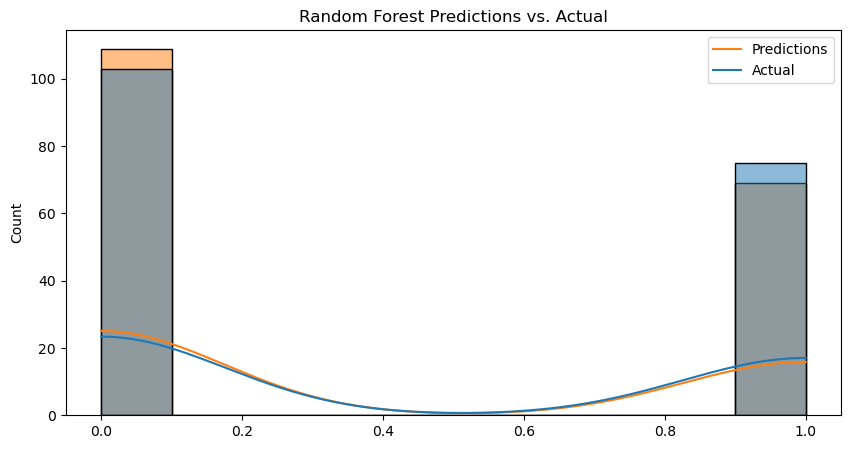

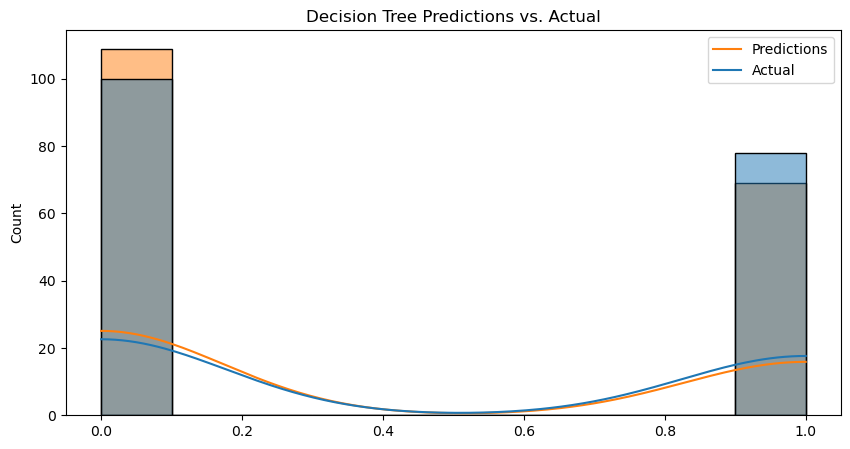

In [37]:
# Visualization of Predictions
plt.figure(figsize=(10, 5))
plt.title("Random Forest Predictions vs. Actual")
sns.histplot([rf_predictions, y_test], kde=True)
plt.legend(['Predictions', 'Actual'])
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Decision Tree Predictions vs. Actual")
sns.histplot([dt_predictions, y_test], kde=True)
plt.legend(['Predictions', 'Actual'])
plt.show()

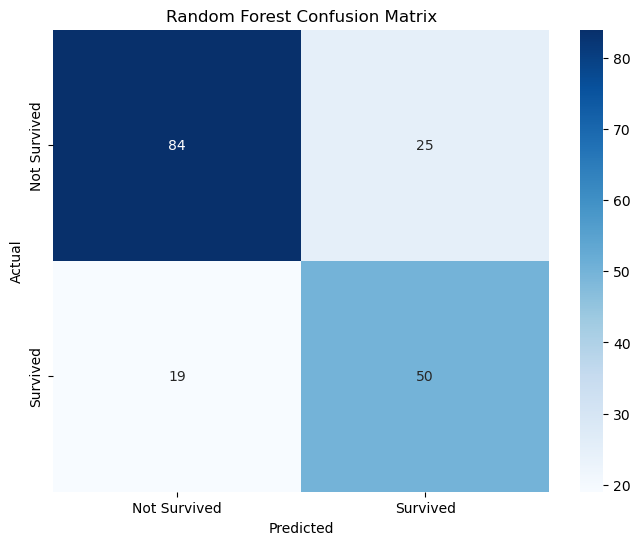

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

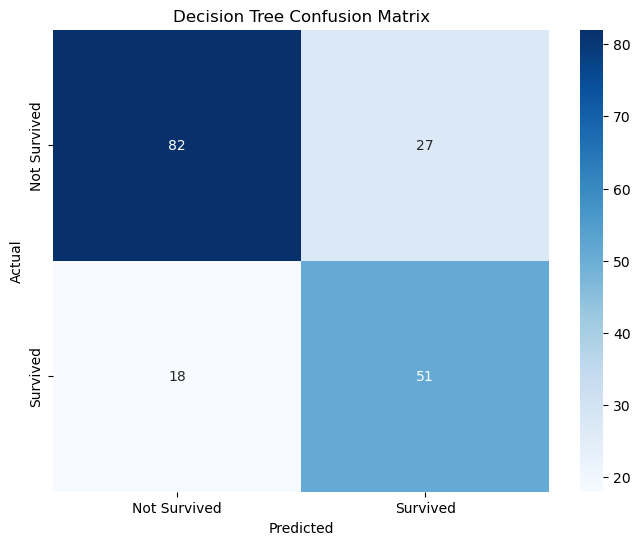

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')


In [38]:
# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       109
           1       0.67      0.72      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       109
           1       0.65      0.74      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178

